In [13]:
#Importing required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random


#Code to generate the Dataset containing locations of houses in each city by create random coordinates for plotting the houses
for i in range(0,100) :
    size=random.randrange(10,20)
    a=list(np.random.randint(low=1, high=10, size=size))
    b=list(np.random.randint(low=1, high=10, size=size))
    
    # Remove duplicate coordinates from the dataset
    k=0
    while k<size:
        j=k+1
        while j<size:
            if(a[k]==a[j]):
                if(b[k]==b[j]):
                    a.remove(a[k])
                    b.remove(b[k])
                    size-=1
            j+=1
        k+=1
    
    dataset = pd.DataFrame({"X" : a, "Y" : b})
    # Scatter PLot for the dataframe
    plt.scatter(dataset["X"], dataset["Y"])
    
    #Save each image generated into a folder
    plt.savefig('G:/PESU/CyberSec_Internship/Images_Dataset/image' + str(i) +".png")
    plt.close()
    
    #Remove repeated headers while appending to dataset
    if (i>0):
        dataset.to_csv('G:/PESU/CyberSec_Internship/Dataset.csv', mode='a',header=False)
    else:
        dataset.to_csv('G:/PESU/CyberSec_Internship/Dataset.csv', mode='a')

In [16]:
#Read the datser
data = pd.read_csv("G:/PESU/CyberSec_Internship/Dataset.csv") 
    
# Creating a 2 dimensional list of coordinates from the dataset corresponding to each city
data['Unnamed: 0']
list1=list()
list2=list()
for i in range(0,data.shape[0]):
    if (data['Unnamed: 0'][i]==0):
        if len(list1)!=0:      
            arr = np.asarray(list1)
            list2.append(arr)
        list1.clear()
        list1.append([data['X'][i],data['Y'][i]])
    else:
        list1.append([data['X'][i],data['Y'][i]])

for l in list2:
    print(l)
    print()
    

[[2 2]
 [7 1]
 [7 3]
 [8 8]
 [2 4]
 [5 3]
 [4 6]
 [5 7]
 [9 6]
 [7 4]
 [3 2]
 [3 1]
 [5 2]
 [9 3]
 [4 9]
 [9 9]]

[[3 5]
 [6 1]
 [3 4]
 [8 7]
 [6 4]
 [2 3]
 [7 6]
 [2 8]
 [6 7]
 [7 2]
 [7 4]
 [4 3]
 [3 1]
 [7 7]]

[[9 3]
 [8 2]
 [2 4]
 [1 8]
 [8 1]
 [6 1]
 [7 9]
 [3 3]
 [7 4]]

[[7 2]
 [8 2]
 [3 8]
 [9 4]
 [3 7]
 [8 9]
 [8 4]
 [5 4]
 [3 5]
 [7 4]
 [2 9]
 [6 9]
 [6 1]
 [6 5]
 [3 1]]

[[5 8]
 [9 7]
 [7 6]
 [3 3]
 [9 4]
 [2 1]
 [2 2]
 [1 2]
 [2 3]
 [7 4]
 [5 7]
 [5 6]
 [1 3]
 [6 8]
 [4 2]]

[[5 3]
 [4 5]
 [8 1]
 [6 2]
 [8 1]
 [9 1]
 [3 3]
 [3 7]
 [1 3]
 [5 8]
 [6 4]
 [1 1]
 [1 8]
 [7 7]
 [8 9]]

[[6 1]
 [1 4]
 [5 8]
 [4 9]
 [3 2]
 [7 7]
 [2 8]
 [2 7]
 [5 4]
 [7 6]
 [6 3]
 [2 8]]

[[8 3]
 [9 6]
 [7 6]
 [8 8]
 [2 1]
 [3 4]
 [3 6]
 [1 6]
 [2 4]
 [4 1]
 [8 7]
 [2 2]
 [9 7]]

[[6 2]
 [6 8]
 [5 6]
 [5 2]
 [4 6]
 [4 1]
 [9 9]
 [1 9]
 [4 5]
 [3 1]
 [2 3]
 [8 9]
 [1 5]
 [2 9]]

[[5 1]
 [1 6]
 [8 8]
 [4 8]
 [8 7]
 [6 5]
 [8 4]
 [5 9]
 [1 4]
 [8 2]
 [9 8]]

[[9 4]
 [2 3]
 [6 9]
 [8 4]
 [7 1]
 [3 3]


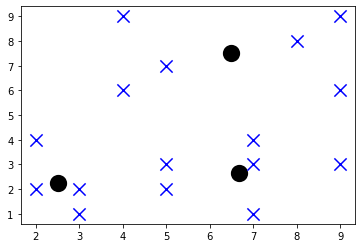

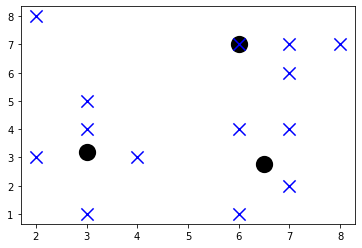

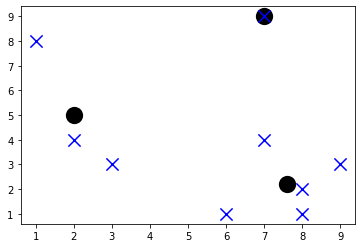

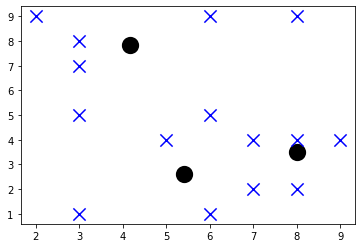

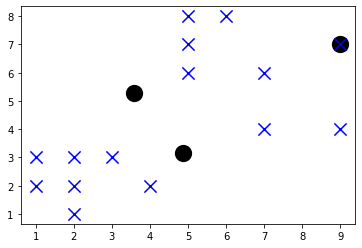

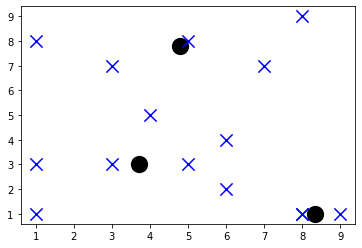

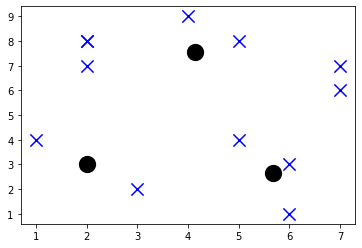

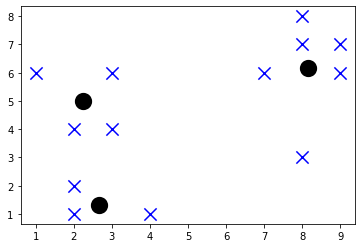

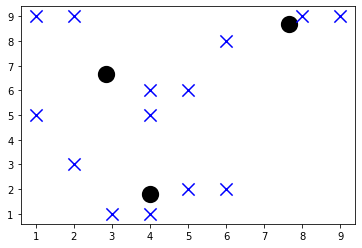

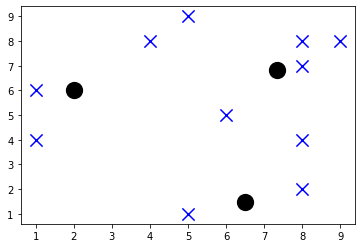

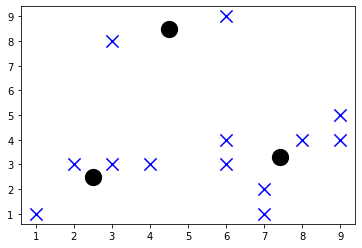

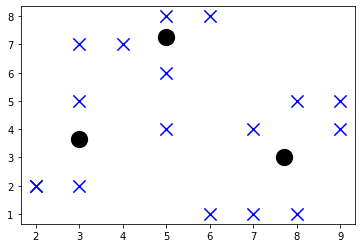

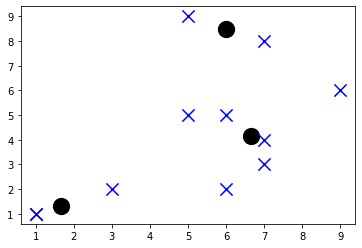

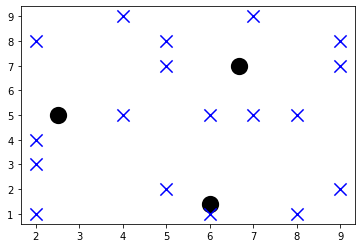

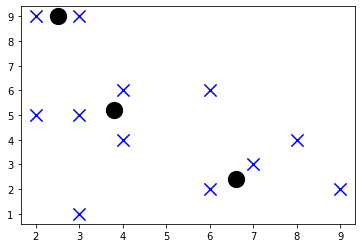

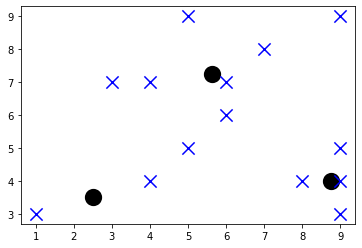

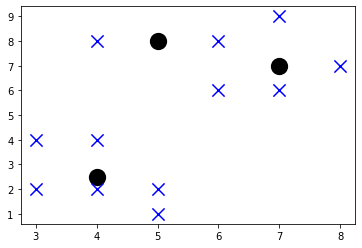

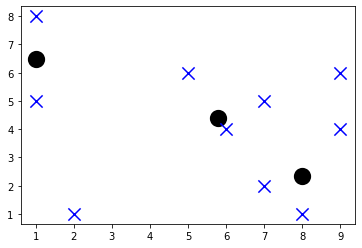

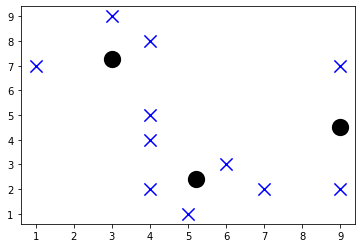

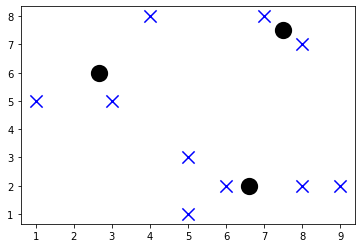

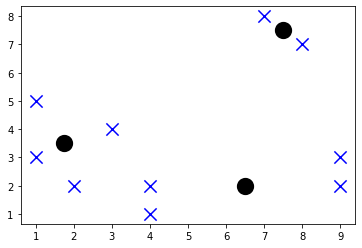

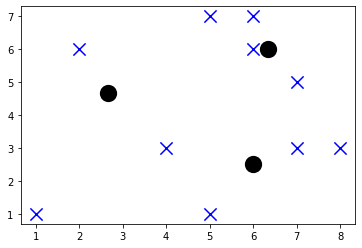

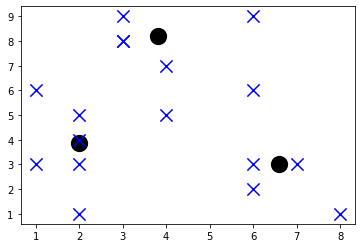

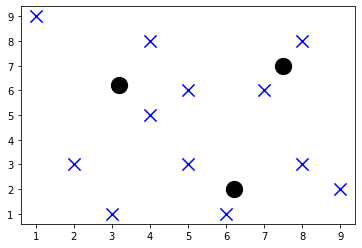

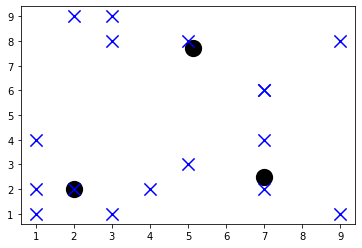

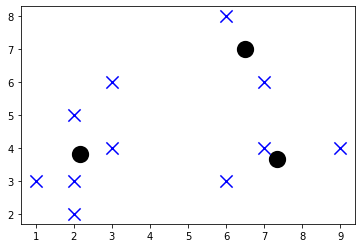

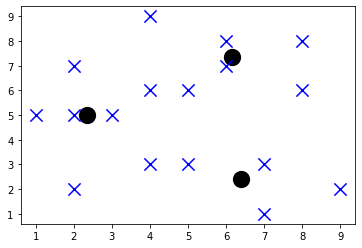

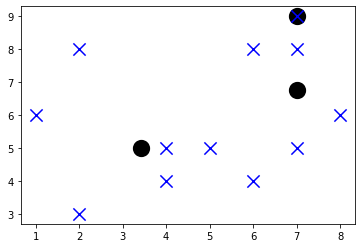

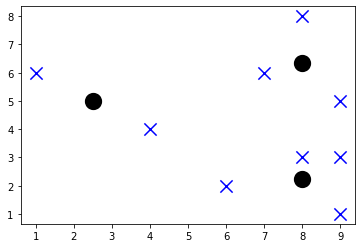

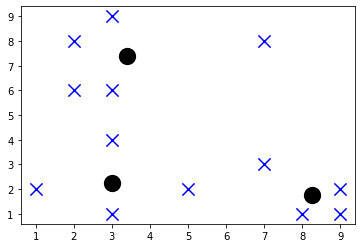

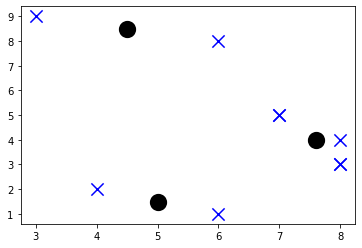

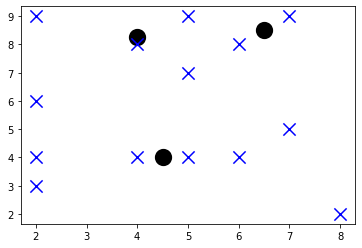

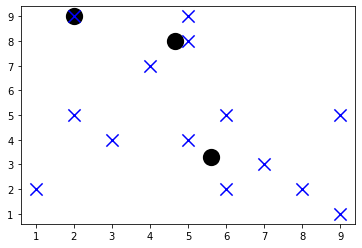

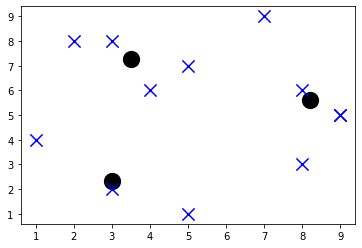

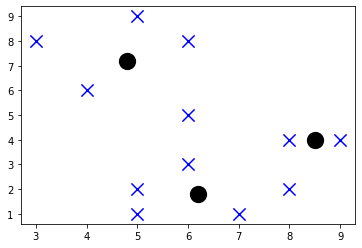

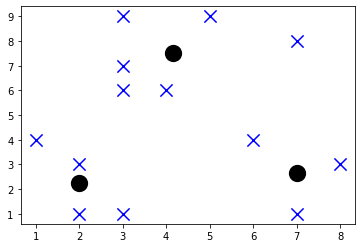

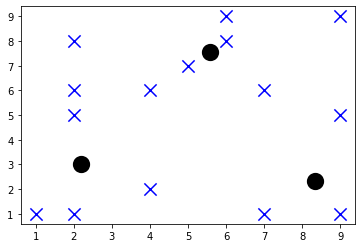

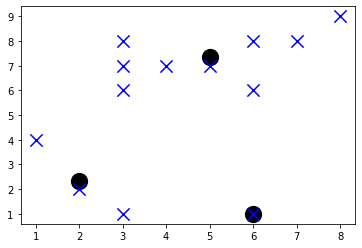

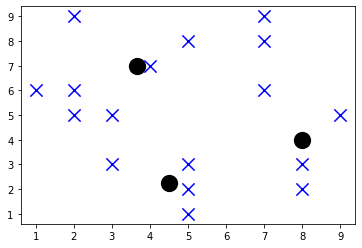

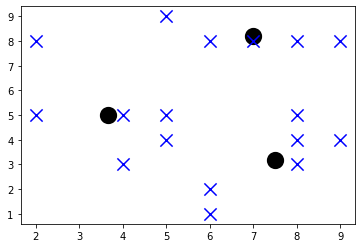

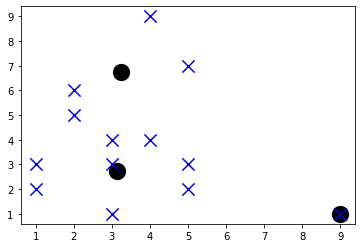

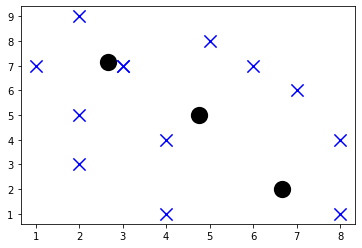

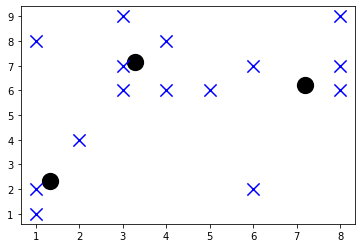

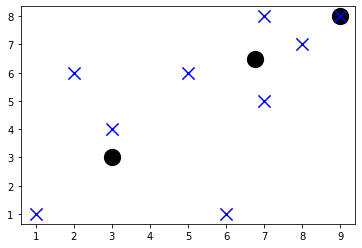

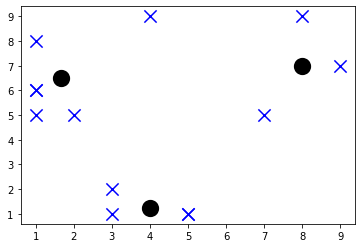

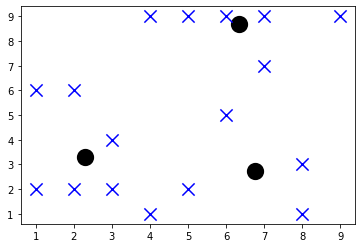

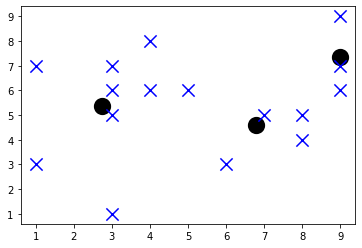

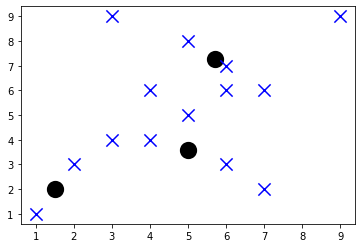

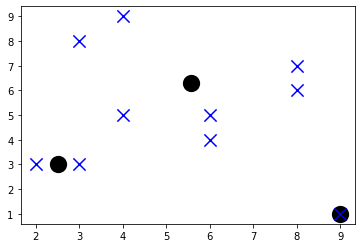

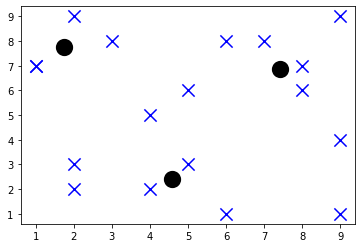

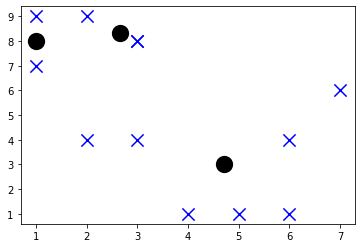

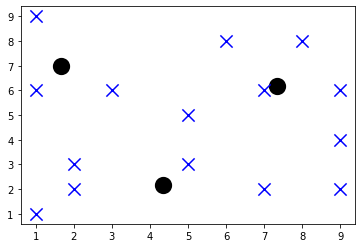

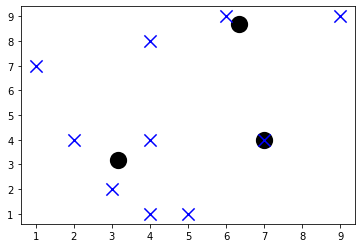

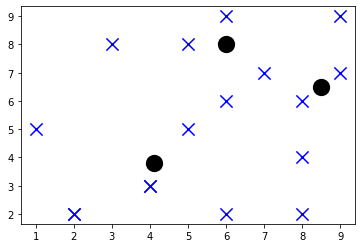

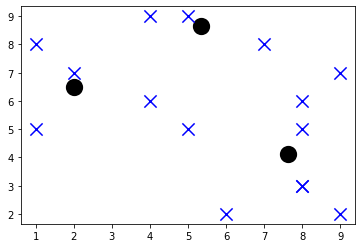

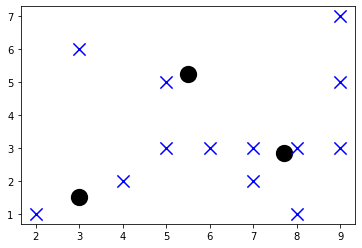

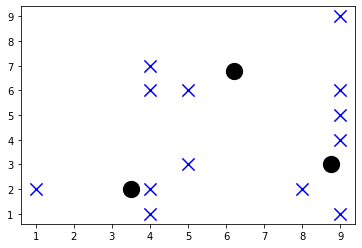

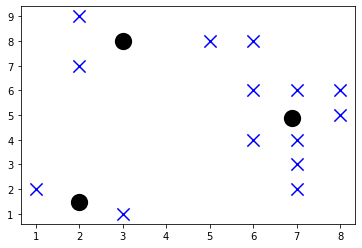

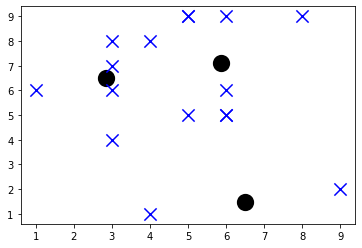

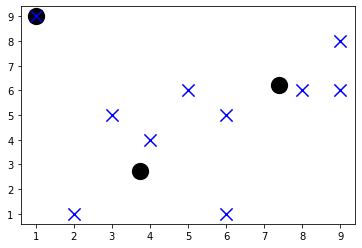

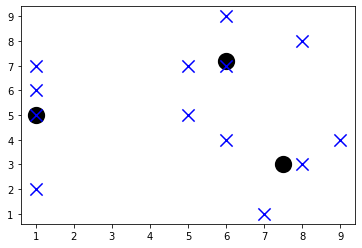

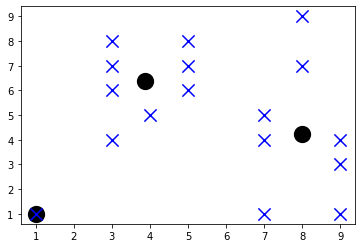

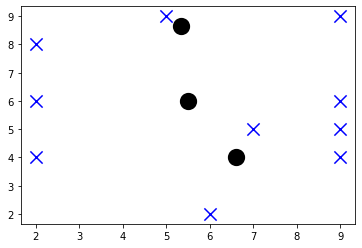

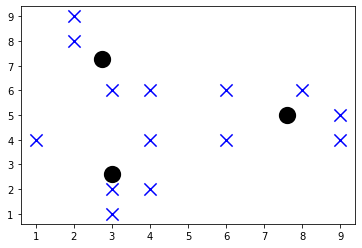

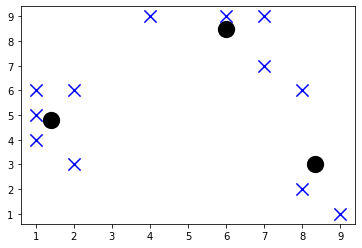

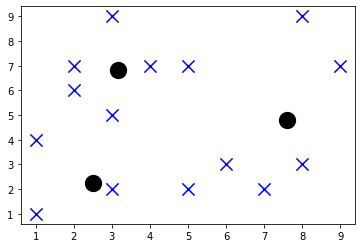

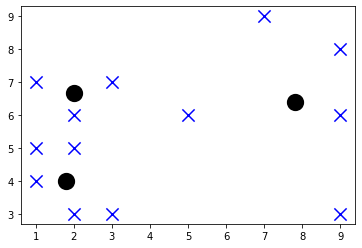

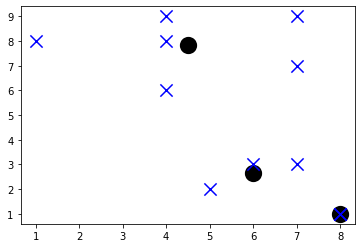

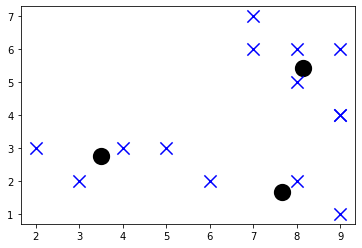

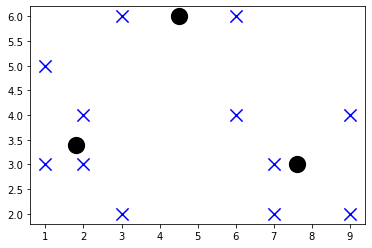

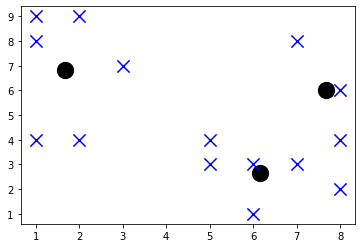

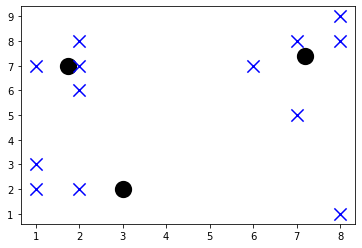

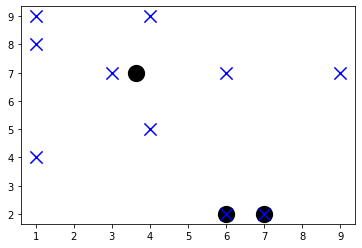

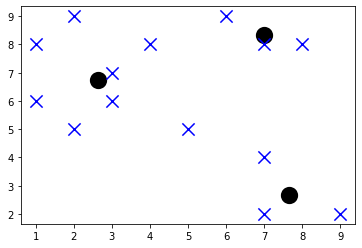

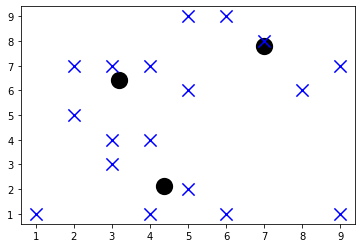

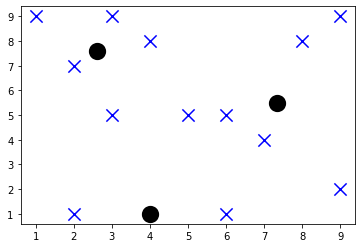

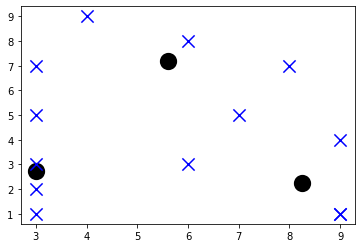

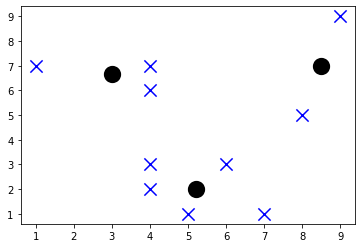

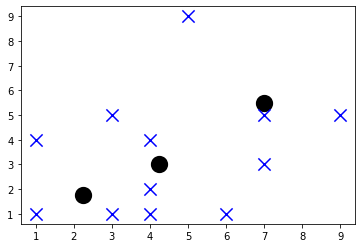

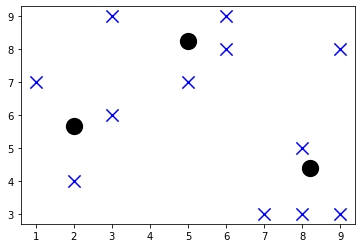

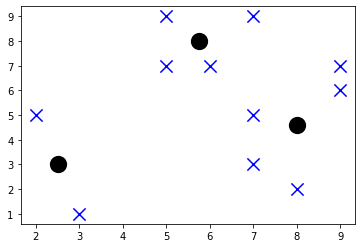

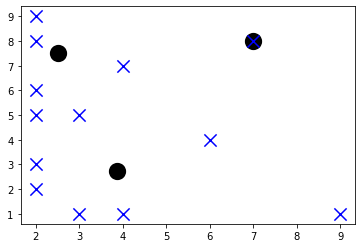

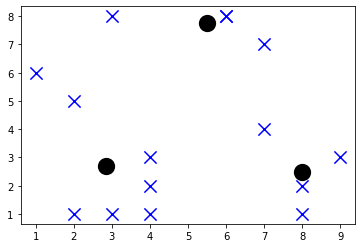

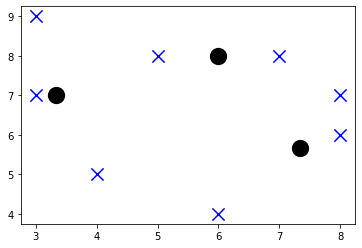

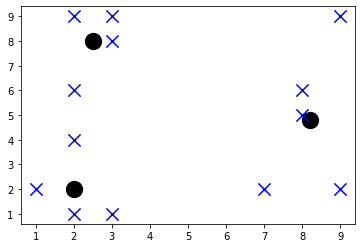

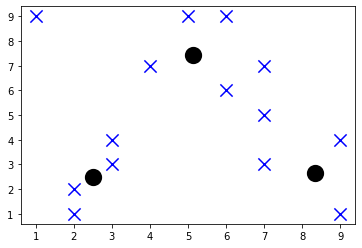

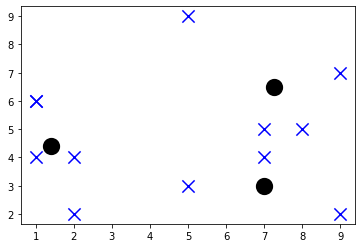

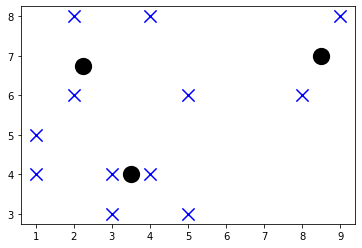

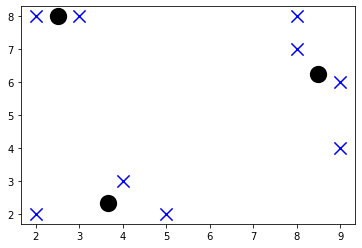

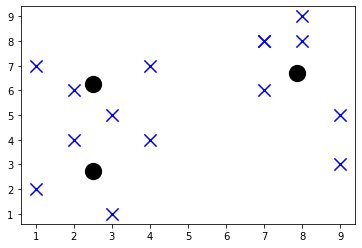

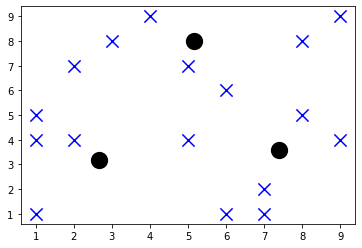

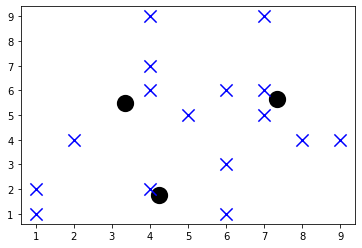

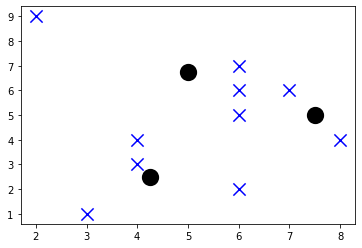

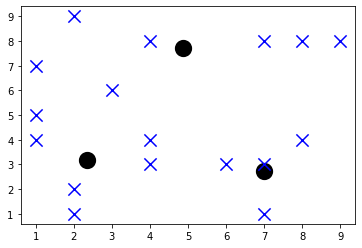

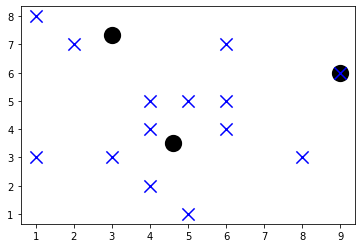

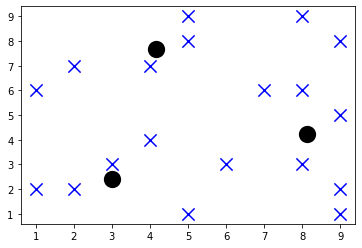

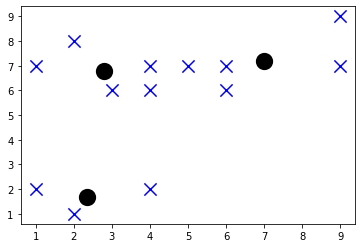

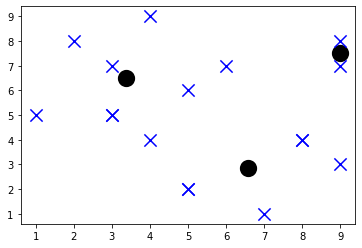

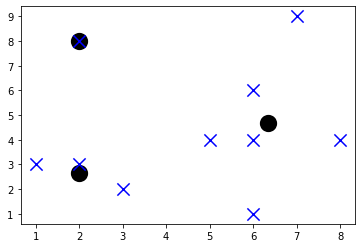

In [17]:
# K-Means Clustering Algorithm
class K_Means:
    def __init__(self, k=3, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            #finding the distance between centroids and all the data points
            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            
            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification
    
for l in list2:
    model = K_Means()
    model.fit(l)
    for centroid in model.centroids:
        plt.scatter(model.centroids[centroid][0], model.centroids[centroid][1],marker="o", color="k", s=150, linewidths=5)

    for classification in model.classifications:
        # color = colors[classification]
        for featureset in model.classifications[classification]:
            plt.scatter(featureset[0], featureset[1], marker="x", color='b', s=150, linewidths=5)
          
    plt.show()